In [1]:
import seaborn as sns
import pandas as pd
import itertools as itt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
pd.set_option('display.float_format', '{:.2g}'.format)

In [2]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

---
## Create plots for overview on local scale analyses (heatmaps) - Fig. 6, S4 and S12

In [3]:
types = ['gene','variant','drug','symptom','comorbidity']

In [4]:
distance_type = 'topology_only' # uncomment for Fig. 6
# distance_type = 'normalized_ranks' # uncomment for Fig. S4
# distance_type = 'normalized_scores' # uncomment for Fig. S12

In [5]:
icd_10_mwu_p_values = pd.DataFrame(index=types,columns=types)
for type_1, type_2 in itt.combinations(types, 2):
    filename = f'disease_disease/{type_1}_vs_{type_2}_ICD10/global_mwu_p_values.csv'
    icd_10_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']
mondo_mwu_p_values = pd.DataFrame(index=types,columns=types)
for type_1, type_2 in itt.combinations(types[:-1], 2):
    filename = f'disease_disease/{type_1}_vs_{type_2}/global_mwu_p_values.csv'
    mondo_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']
umls_mwu_p_values = pd.DataFrame(index=types,columns=types)
for type_1, type_2 in itt.combinations(types[:-1], 2):
    filename = f'disease_disease/{type_1}_vs_{type_2}_UMLS/global_mwu_p_values.csv'
    umls_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']

/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/1433356806.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/1433356806.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/1433356806.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m4

In [6]:
for type_1, type_2 in itt.permutations(types, 2):
    if np.isnan(icd_10_mwu_p_values.loc[type_1, type_2]):
        icd_10_mwu_p_values.loc[type_1, type_2] = icd_10_mwu_p_values.loc[type_2, type_1]
for type_1, type_2 in itt.permutations(types[:-1], 2):
    if np.isnan(mondo_mwu_p_values.loc[type_1, type_2]):
        mondo_mwu_p_values.loc[type_1, type_2] = mondo_mwu_p_values.loc[type_2, type_1]
    if np.isnan(umls_mwu_p_values.loc[type_1, type_2]):
        umls_mwu_p_values.loc[type_1, type_2] = umls_mwu_p_values.loc[type_2, type_1]
icd_10_mwu_p_values.index = pd.CategoricalIndex(types, name='connector')
icd_10_mwu_p_values.columns = pd.CategoricalIndex(types, name='connector')
mondo_mwu_p_values.index = pd.CategoricalIndex(types, name='connector')
mondo_mwu_p_values.columns = pd.CategoricalIndex(types, name='connector')
umls_mwu_p_values.index = pd.CategoricalIndex(types, name='connector')
umls_mwu_p_values.columns = pd.CategoricalIndex(types, name='connector')
icd_10_mwu_p_values = icd_10_mwu_p_values.astype(float)
mondo_mwu_p_values = mondo_mwu_p_values.astype(float)
umls_mwu_p_values = umls_mwu_p_values.astype(float)

In [7]:
def p_value_to_significance(p):
    if p <= 0.0001:
        return 4
    elif p <= 0.001:
        return 3
    elif p <= 0.01:
        return 2
    elif p <= 0.05:
        return 1
    else:
        return 0

In [8]:
icd_10_mwu_levels = pd.DataFrame(index=types,columns=types,dtype=int)
mondo_mwu_levels = pd.DataFrame(index=types,columns=types,dtype=int)
umls_mwu_levels = pd.DataFrame(index=types,columns=types,dtype=int)
for type_1, type_2 in itt.permutations(types, 2):
    icd_10_mwu_levels.loc[type_1, type_2] = p_value_to_significance(icd_10_mwu_p_values.loc[type_1, type_2])
for type_1, type_2 in itt.permutations(types[:-1], 2):
    mondo_mwu_levels.loc[type_1, type_2] = p_value_to_significance(mondo_mwu_p_values.loc[type_1, type_2])
    umls_mwu_levels.loc[type_1, type_2] = p_value_to_significance(umls_mwu_p_values.loc[type_1, type_2])
icd_10_mwu_levels.index = pd.CategoricalIndex(types, name='edge type')
icd_10_mwu_levels.columns = pd.CategoricalIndex(types, name='edge type')
mondo_mwu_levels.index = pd.CategoricalIndex(types, name='edge type')
mondo_mwu_levels.columns = pd.CategoricalIndex(types, name='edge type')
umls_mwu_levels.index = pd.CategoricalIndex(types, name='edge type')
umls_mwu_levels.columns = pd.CategoricalIndex(types, name='edge type')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


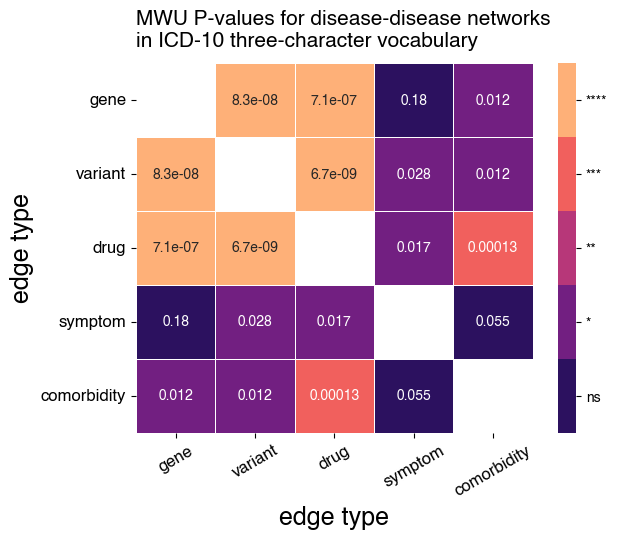

In [9]:
cmap = sns.color_palette("magma", 5) 
ax = sns.heatmap(icd_10_mwu_levels, cmap=cmap, annot=icd_10_mwu_p_values, linewidths=.5, vmin=0, vmax=4)
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / 5 * (0.5 + i) for i in range(5)])
colorbar.set_ticklabels(['ns','*','**','***','****'])              
ax.set_title('MWU P-values for disease-disease networks\nin ICD-10 three-character vocabulary', loc='left', fontsize=15, pad=12)
plt.xticks(rotation=30, size=12)
plt.yticks(rotation=0,size=12)
plt.xlabel('edge type', fontsize=18, labelpad=5)
plt.ylabel('edge type', fontsize=18, labelpad=5)
plt.savefig('dis_dis_icd10_topology.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. 6
plt.savefig('dis_dis_icd10_topology.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. 6
# plt.savefig('dis_dis_icd10_normRank.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S4
# plt.savefig('dis_dis_icd10_normRank.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S4
# plt.savefig('dis_dis_icd10_normScore.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S12
# plt.savefig('dis_dis_icd10_normScore.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S12

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


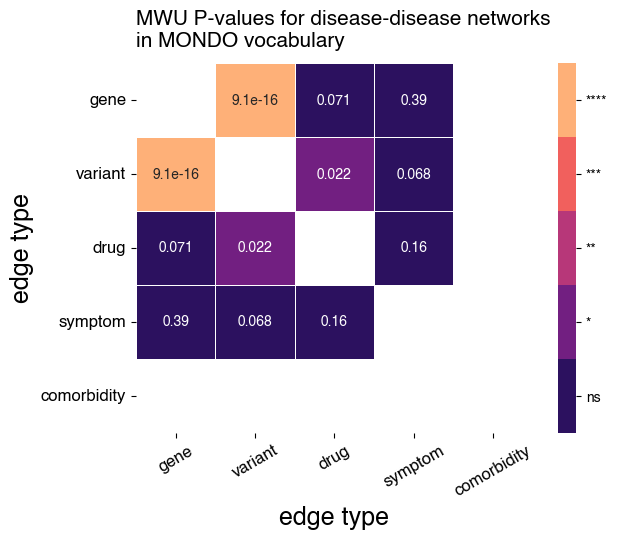

In [10]:
cmap = sns.color_palette("magma", 5) 
ax = sns.heatmap(mondo_mwu_levels, cmap=cmap, annot=mondo_mwu_p_values, linewidths=.5, vmin=0, vmax=4)
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / 5 * (0.5 + i) for i in range(5)])
colorbar.set_ticklabels(['ns','*','**','***','****'])    
ax.set_title('MWU P-values for disease-disease networks\nin MONDO vocabulary', loc='left', fontsize=15, pad=12)
plt.xticks(rotation=30, size=12)
plt.yticks(rotation=0,size=12)
plt.xlabel('edge type', fontsize=18, labelpad=5)
plt.ylabel('edge type', fontsize=18, labelpad=5)
plt.savefig('dis_dis_mondo_topology.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. 6
plt.savefig('dis_dis_mondo_topology.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. 6
# plt.savefig('dis_dis_mondo_normRank.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S4
# plt.savefig('dis_dis_mondo_normRank.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S4
# plt.savefig('dis_dis_mondo_normScore.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S12
# plt.savefig('dis_dis_mondo_normScore.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S12

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


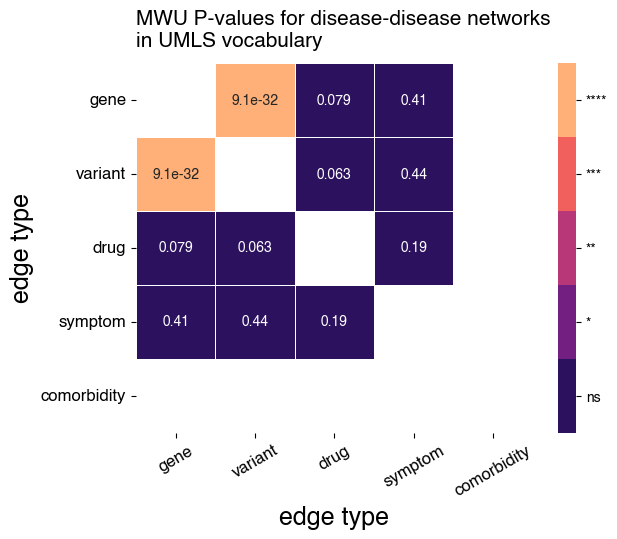

In [11]:
cmap = sns.color_palette("magma", 5) 
ax = sns.heatmap(umls_mwu_levels, cmap=cmap, annot=umls_mwu_p_values, linewidths=.5, vmin=0, vmax=4)
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / 5 * (0.5 + i) for i in range(5)])
colorbar.set_ticklabels(['ns','*','**','***','****'])    
ax.set_title('MWU P-values for disease-disease networks\nin UMLS vocabulary', loc='left', fontsize=15, pad=12)
plt.xticks(rotation=30, size=12)
plt.yticks(rotation=0,size=12)
plt.xlabel('edge type', fontsize=18, labelpad=5)
plt.ylabel('edge type', fontsize=18, labelpad=5)
plt.savefig('dis_dis_umls_topology.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. 6
plt.savefig('dis_dis_umls_topology.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. 6
# plt.savefig('dis_dis_umls_normRank.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S4
# plt.savefig('dis_dis_umls_normRank.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S4
# plt.savefig('dis_dis_umls_normScore.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S12
# plt.savefig('dis_dis_umls_normScore.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S12

In [12]:
namespaces = pd.CategoricalIndex(['ICD-10', 'MONDO', 'UMLS', 'target vs.\nindication'], name='vocabulary or edge types in drug-drug networks')
node_types = pd.CategoricalIndex(['drug', 'disease'], name='node type')
drug_disease_p_values = pd.DataFrame(index=namespaces,columns=node_types,dtype=float)
drug_disease_levels = pd.DataFrame(index=namespaces,columns=node_types,dtype=int)
for namespace in ['ICD-10', 'MONDO', 'UMLS']:
    for node_type in node_types:
        filename = f'drug_disease/indication_vs_associated_target_{namespace}/global_mwu_p_values_{node_type}s.csv'
        drug_disease_p_values.loc[{namespace},{node_type}] = pd.read_csv(filename, index_col='distance_type').loc['topology_only','p_value']
        drug_disease_levels.loc[{namespace},{node_type}] = p_value_to_significance(pd.read_csv(filename).loc[0,'p_value'])
filename = f'drug_drug/global_mwu_p_values.csv'
drug_disease_p_values.loc['target vs.\nindication','drug'] = pd.read_csv(filename, index_col='distance_type').loc['topology_only','p_value']
drug_disease_levels.loc['target vs.\nindication','drug'] = p_value_to_significance(pd.read_csv(filename).loc[0,'p_value'])

/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/4141760640.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_p_values.loc[{namespace},{node_type}] = pd.read_csv(filename, index_col='distance_type').loc['topology_only','p_value']
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/4141760640.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_p_values.loc[{namespace},{node_type}] = pd.read_csv(filename, index_col='distance_type').loc['topology_only','p_value']
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/4141760640.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_levels.loc[{namespace},{node_type}] = p_value_to_significance(pd.read_csv(filename).loc[0,'p_value'])
/var/folders/r1/j3cs02p96yn8

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


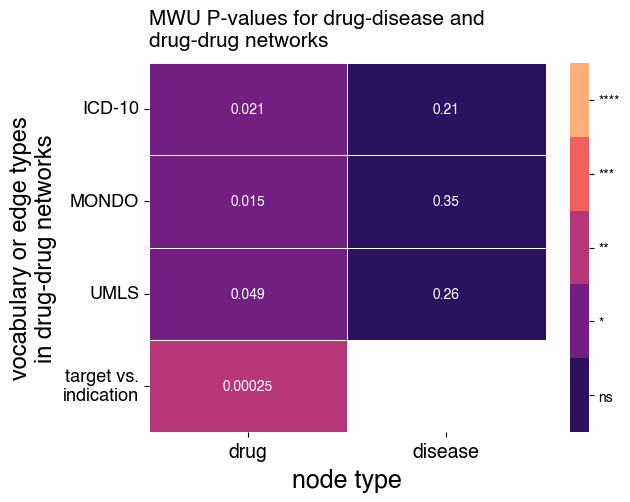

In [13]:
cmap = sns.color_palette("magma", 5) 
ax = sns.heatmap(drug_disease_levels, cmap=cmap, annot=drug_disease_p_values, linewidths=.5, vmin=0, vmax=4)
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / 5 * (0.5 + i) for i in range(5)])
colorbar.set_ticklabels(['ns','*','**','***','****'])    
ax.set_title('MWU P-values for drug-disease and\ndrug-drug networks', loc='left', fontsize=15, pad=12)
plt.xticks(size=14)
plt.yticks(rotation=0,size=13)
plt.xlabel('node type', fontsize=18, labelpad=5)
plt.ylabel('vocabulary or edge types\nin drug-drug networks', fontsize=17)
plt.savefig('drug_dis_mondo_topology.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. 6
plt.savefig('drug_dis_mondo_topology.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. 6

In [15]:
types = ['gene','variant','drug','symptom','comorbidity']
icd_10_local_p_values = pd.DataFrame(index=types,columns=types)
for type_1, type_2 in itt.combinations(types, 2):
    filename = f'disease_disease/{type_1}_vs_{type_2}_ICD10/local_empirical_p_values.csv'
    pv = pd.read_csv(filename)
    indices_remove = pv[pv['distance_type'] != distance_type].index
    pv.drop(indices_remove, inplace=True)
    total_pvals = len(pv)
    indices_remove = pv[pv['p_value'] > 0.05].index
    pv.drop(indices_remove, inplace=True)
    signif_pvals = len(pv)
    icd_10_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
# print(icd_10_local_p_values)

mondo_local_p_values = pd.DataFrame(index=types,columns=types)
for type_1, type_2 in itt.combinations(types[:-1], 2):
    filename = f'disease_disease/{type_1}_vs_{type_2}/local_empirical_p_values.csv'
    pv = pd.read_csv(filename)
    indices_remove = pv[pv['distance_type'] != distance_type].index
    pv.drop(indices_remove, inplace=True)
    total_pvals = len(pv)
    indices_remove = pv[pv['p_value'] > 0.05].index
    pv.drop(indices_remove, inplace=True)
    signif_pvals = len(pv)
    mondo_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
# print(mondo_local_p_values)

umls_local_p_values = pd.DataFrame(index=types,columns=types)
for type_1, type_2 in itt.combinations(types[:-1], 2):
    filename = f'disease_disease/{type_1}_vs_{type_2}_UMLS/local_empirical_p_values.csv'
    pv = pd.read_csv(filename)
    indices_remove = pv[pv['distance_type'] != distance_type].index
    pv.drop(indices_remove, inplace=True)
    total_pvals = len(pv)
    indices_remove = pv[pv['p_value'] > 0.05].index
    pv.drop(indices_remove, inplace=True)
    signif_pvals = len(pv)
    umls_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
# print(umls_local_p_values)

/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/2895479041.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/2895479041.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/2895479041.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/2895479041.py:12: FutureWarning: Passing a set as an indexer is deprecated and will

In [16]:
for type_1, type_2 in itt.permutations(types, 2):
    if np.isnan(icd_10_local_p_values.loc[type_1, type_2]):
        icd_10_local_p_values.loc[type_1, type_2] = icd_10_local_p_values.loc[type_2, type_1]
for type_1, type_2 in itt.permutations(types[:-1], 2):
    if np.isnan(mondo_local_p_values.loc[type_1, type_2]):
        mondo_local_p_values.loc[type_1, type_2] = mondo_local_p_values.loc[type_2, type_1]
for type_1, type_2 in itt.permutations(types[:-1], 2):
    if np.isnan(umls_local_p_values.loc[type_1, type_2]):
        umls_local_p_values.loc[type_1, type_2] = umls_local_p_values.loc[type_2, type_1]
icd_10_local_p_values.index = pd.CategoricalIndex(types, name='connector')
icd_10_local_p_values.columns = pd.CategoricalIndex(types, name='connector')
mondo_local_p_values.index = pd.CategoricalIndex(types, name='connector')
mondo_local_p_values.columns = pd.CategoricalIndex(types, name='connector')
umls_local_p_values.index = pd.CategoricalIndex(types, name='connector')
umls_local_p_values.columns = pd.CategoricalIndex(types, name='connector')
icd_10_local_p_values = icd_10_local_p_values.astype(float)
mondo_local_p_values = mondo_local_p_values.astype(float)
umls_local_p_values = umls_local_p_values.astype(float)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


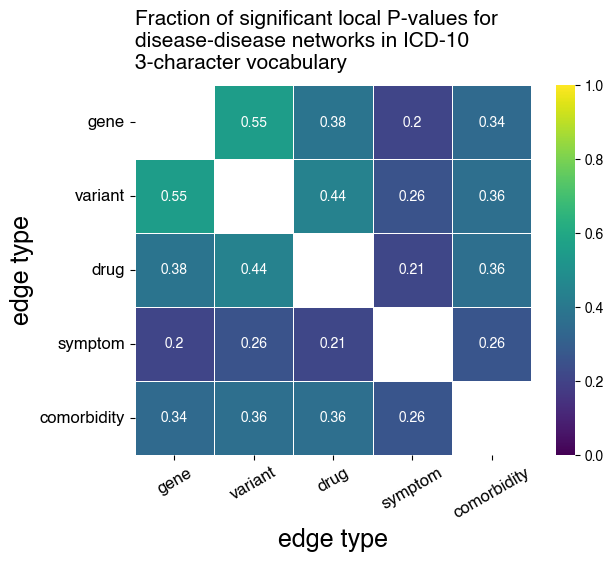

In [17]:
ax = sns.heatmap(icd_10_local_p_values, cmap = 'viridis', annot=icd_10_local_p_values, linewidths=.5, vmin=0.0, vmax=1.0)            
ax.set_title('Fraction of significant local P-values for\ndisease-disease networks in ICD-10\n3-character vocabulary', loc='left', fontsize=15, pad=12)
plt.xticks(rotation=30, size=12)
plt.yticks(rotation=0,size=12)
plt.xlabel('edge type', fontsize=18, labelpad=5)
plt.ylabel('edge type', fontsize=18)
plt.savefig('dis_dis_icd10_sigFrac_topology.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. 6
plt.savefig('dis_dis_icd10_sigFrac_topology.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. 6
# plt.savefig('dis_dis_icd10_sigFrac_normRank.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S4
# plt.savefig('dis_dis_icd10_sigFrac_normRank.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S4
# plt.savefig('dis_dis_icd10_sigFrac_normScore.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S12
# plt.savefig('dis_dis_icd10_sigFrac_normScore.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S12

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


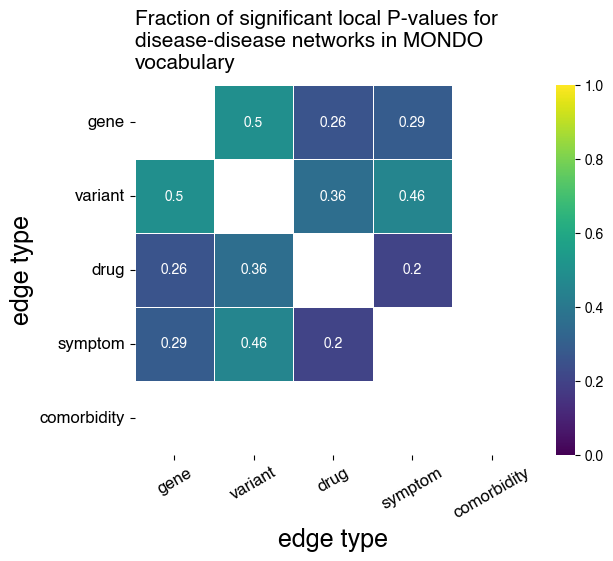

In [18]:
ax = sns.heatmap(mondo_local_p_values, cmap = 'viridis', annot=mondo_local_p_values, linewidths=.5, vmin=0.0, vmax=1.0)             
ax.set_title('Fraction of significant local P-values for\ndisease-disease networks in MONDO\nvocabulary', loc='left', fontsize=15, pad=12)
plt.xticks(rotation=30,size=12)
plt.yticks(rotation=0,size=12)
plt.xlabel('edge type', fontsize=18, labelpad=5)
plt.ylabel('edge type', fontsize=18)
plt.savefig('dis_dis_mondo_sigFrac_topology.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. 6
plt.savefig('dis_dis_mondo_sigFrac_topology.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. 6
# plt.savefig('dis_dis_mondo_sigFrac_normRank.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S4
# plt.savefig('dis_dis_mondo_sigFrac_normRank.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S4
# plt.savefig('dis_dis_mondo_sigFrac_normScore.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S12
# plt.savefig('dis_dis_mondo_sigFrac_normScore.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S12

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


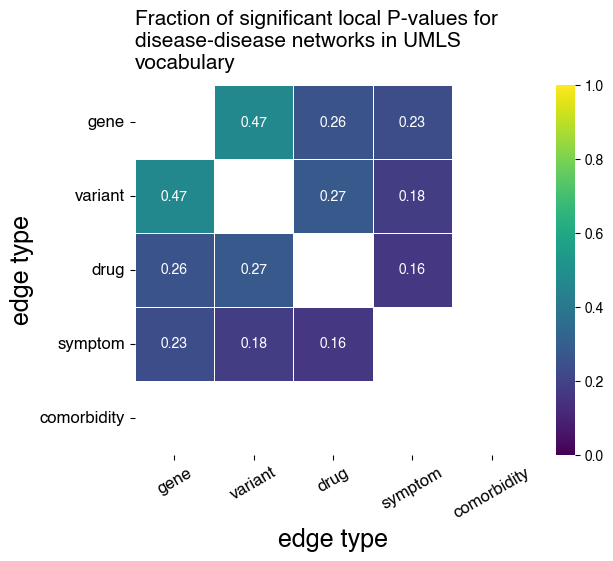

In [19]:
ax = sns.heatmap(umls_local_p_values, cmap = 'viridis', annot=umls_local_p_values, linewidths=.5, vmin=0.0, vmax=1.0)             
ax.set_title('Fraction of significant local P-values for\ndisease-disease networks in UMLS\nvocabulary', loc='left', fontsize=15, pad=12)
plt.xticks(rotation=30, size=12)
plt.yticks(rotation=0,size=12)
plt.xlabel('edge type', fontsize=18, labelpad=5)
plt.ylabel('edge type', fontsize=18)
plt.savefig('dis_dis_umls_sigFrac_topology.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. 6
plt.savefig('dis_dis_umls_sigFrac_topology.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. 6
# plt.savefig('dis_dis_umls_sigFrac_normRank.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S4
# plt.savefig('dis_dis_umls_sigFrac_normRank.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S4
# plt.savefig('dis_dis_umls_sigFrac_normScore.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. S12
# plt.savefig('dis_dis_umls_sigFrac_normScore.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. S12

In [20]:
namespaces = pd.CategoricalIndex(['ICD-10', 'MONDO', 'UMLS','target vs.\nindication'], name='vocabulary or edge types in drug-drug networks')
node_types = pd.CategoricalIndex(['drug', 'disease'], name='node type')
drug_disease_p_values = pd.DataFrame(index=namespaces,columns=node_types,dtype=float)
    
for namespace in ['ICD-10', 'MONDO', 'UMLS']:
    for node_type in node_types:
        filename = f'drug_disease/indication_vs_associated_target_{namespace}/local_empirical_p_values_{node_type}s.csv'
        pv = pd.read_csv(filename, sep = '\t')
        total_pvals = len(pv)
        indices_remove = pv[pv['p_value'] > 0.05].index
        pv.drop(indices_remove, inplace=True)
        signif_pvals = len(pv)
        drug_disease_p_values.loc[{namespace},{node_type}] = float(signif_pvals)/float(total_pvals)   
filename = f'drug_drug/local_empirical_p_values.csv'
pv = pd.read_csv(filename)
total_pvals = len(pv)
indices_remove = pv[pv['p_value'] > 0.05].index
pv.drop(indices_remove, inplace=True)
signif_pvals = len(pv)
drug_disease_p_values.loc['target vs.\nindication','drug'] = float(signif_pvals)/float(total_pvals)   
# print(drug_disease_p_values)

/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/2335487586.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_p_values.loc[{namespace},{node_type}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/2335487586.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_p_values.loc[{namespace},{node_type}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/2335487586.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_p_values.loc[{namespace},{node_type}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_46184/2335487586.py:13: FutureWarning: Passing a set as an indexer is d

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


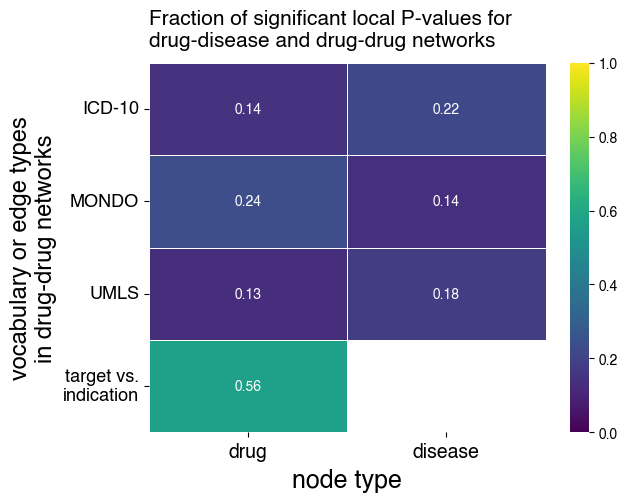

In [21]:
ax = sns.heatmap(drug_disease_p_values, cmap='viridis', annot=drug_disease_p_values, linewidths=.5, vmin=0.0, vmax=1.0)   
ax.set_title('Fraction of significant local P-values for\ndrug-disease and drug-drug networks', loc='left', fontsize=15, pad=12)
plt.xticks(size=14)
plt.yticks(rotation=0,size=13)
plt.xlabel('node type', fontsize=18, labelpad=5)
plt.ylabel('vocabulary or edge types\nin drug-drug networks', fontsize=17)
plt.savefig('drug_dis_mondo_sigFrac_topology.png', bbox_inches='tight', transparent = True, dpi=600) # uncomment for Fig. 6
plt.savefig('drug_dis_mondo_sigFrac_topology.pdf',bbox_inches='tight', transparent = True) # uncomment for Fig. 6

---
## Create plots for Fig. 7

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


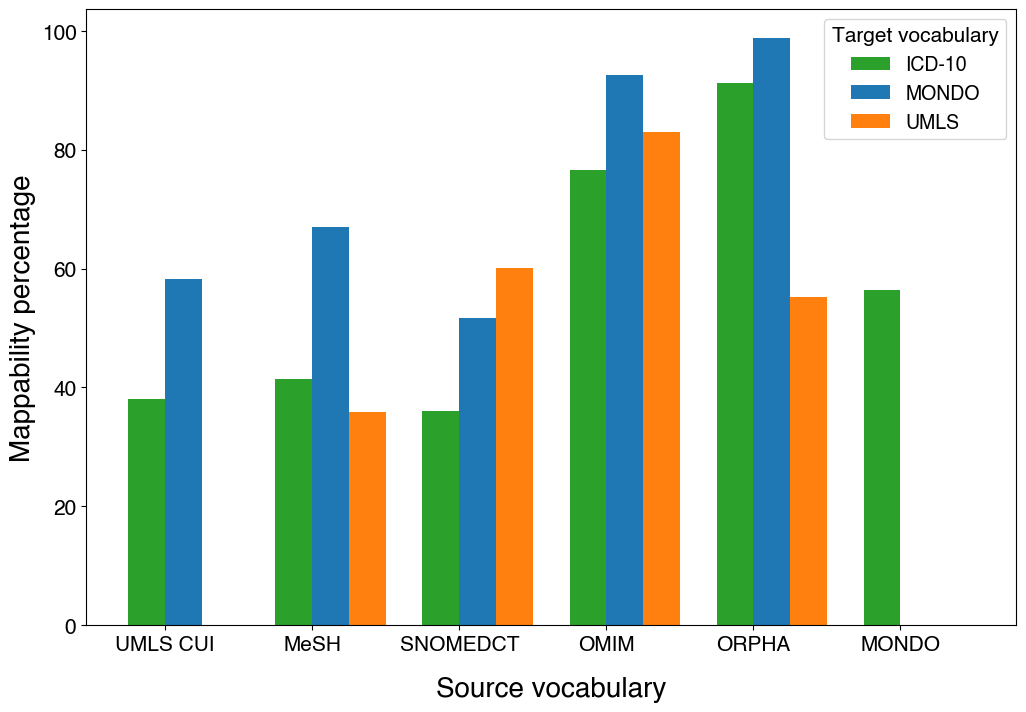

In [25]:
# UMLS CUI
# MeSH
# SNOMEDCT
# OMIM
# ORPHA
# MONDO
barWidth = 0.25
fig = plt.subplots(figsize=(12, 8))
ICD = [38.13, 41.39, 35.99, 76.63, 91.19, 56.38]
MONDO = [58.28, 66.99, 51.74, 92.60, 98.78, 0]
UMLS = [0, 35.79, 60.14, 83.09, 55.16, 0]
br1 = np.arange(len(ICD))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
plt.bar(br1, ICD, color='#2ba02b', width=barWidth, label='ICD-10')
plt.bar(br2, MONDO, color='#1f77b4', width=barWidth, label='MONDO')
plt.bar(br3, UMLS, color='#ff7f0f', width=barWidth, label='UMLS') 
plt.xlabel('Source vocabulary', fontsize=20, labelpad=16)
plt.ylabel('Mappability percentage', fontsize=20)
plt.xticks([r + barWidth/2 for r in range(len(ICD))], ['UMLS CUI', 'MeSH', 'SNOMEDCT', 'OMIM', 'ORPHA', 'MONDO'], fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['ICD-10','MONDO', 'UMLS'], title = "Target vocabulary", title_fontsize = 15, fontsize=14)
plt.savefig('mappability_plot.png', bbox_inches='tight', transparent = True, dpi=600)
plt.savefig('mappability_plot.pdf',bbox_inches='tight', transparent = True)

---
## Create plots for Fig. 8

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


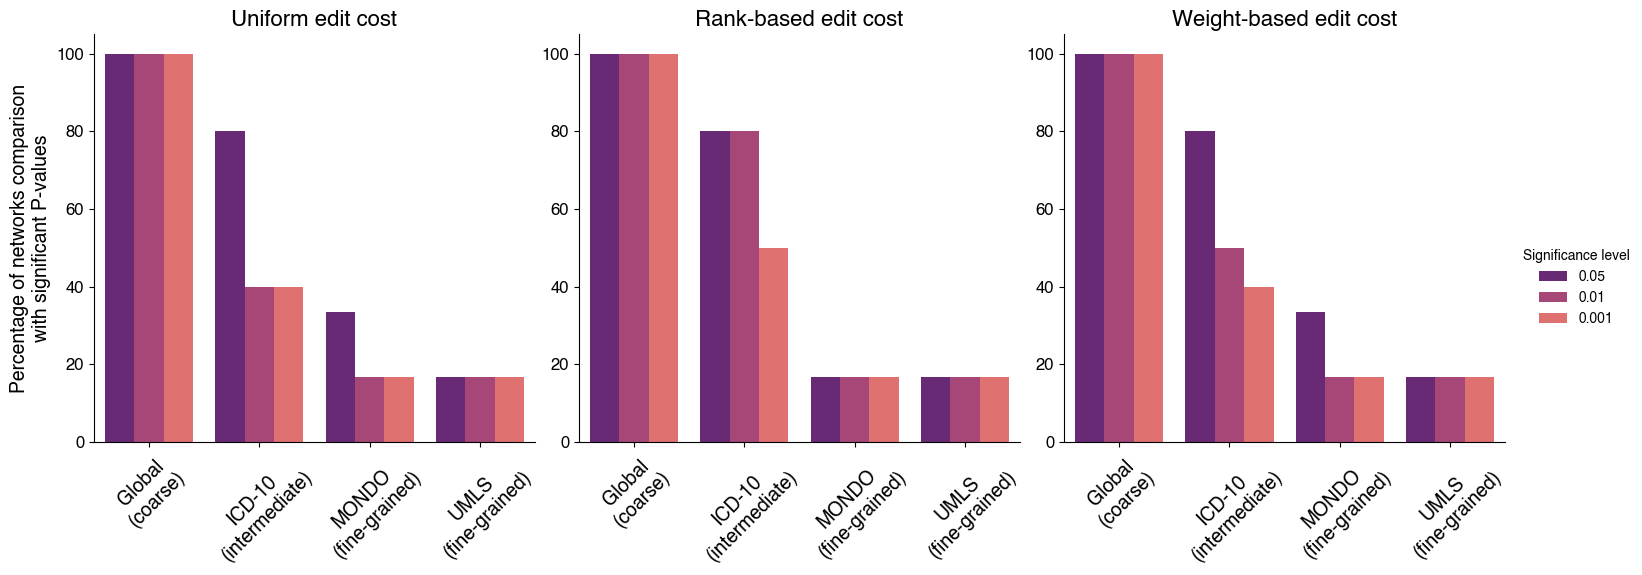

In [24]:
pVals = pd.read_csv('granularity_vs_Pval_significance.txt', sep='\t', index_col=None)
fig = sns.catplot(data=pVals, sharey=False, kind='bar', palette=sns.color_palette(['#721e81', '#b73779', '#f1605d']), x='Granularity type', col='Edit cost',
                  y='Percentage of significance P-values', hue='Significance level', hue_order=[0.05, 0.01, 0.001], col_wrap=3)
# plt.figure(figsize=(15,8))
# matplotlib.axes.Axes.set_xticklabels(self,xlabel,fontdict=None,labelpad=None)
plt.subplots_adjust(wspace = 0.1)
for axis in fig.axes.flatten():
    titl = axis.get_title().split(' = ')[1] + ' edit cost'
    axis.set_title(titl, loc='center', fontdict={'fontsize': 16, 'fontweight': 'medium'})
for axis in fig.axes.flatten():
    axis.set_xlabel('')
    xticklabels = [text.get_text() for text in axis.get_xticklabels()]
    axis.tick_params(axis="x", labelrotation=45)
#     axis.set_xticklabels([label for label in xticklabels], fontsize=14)
    axis.set_xticklabels(['Global\n(coarse)', 'ICD-10\n(intermediate)', 'MONDO\n(fine-grained)', 'UMLS\n(fine-grained)'], fontsize=14)
fig.axes.flatten()[0].set_ylabel('Percentage of networks comparison\nwith significant P-values', fontsize=14)
for axis in fig.axes.flatten():
    axis.tick_params(axis='y', which='major', labelsize=12)
plt.savefig('granularity_vs_Pval_significance.png', bbox_inches='tight', transparent = True, dpi=600)
plt.savefig('granularity_vs_Pval_significance.pdf', bbox_inches='tight', transparent = True)